In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [4]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')

In [5]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### preprocess

In [6]:
data = raw_data.drop(['Model'],axis=1)

In [7]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
data_no_mv = data.dropna(axis=0)

In [11]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

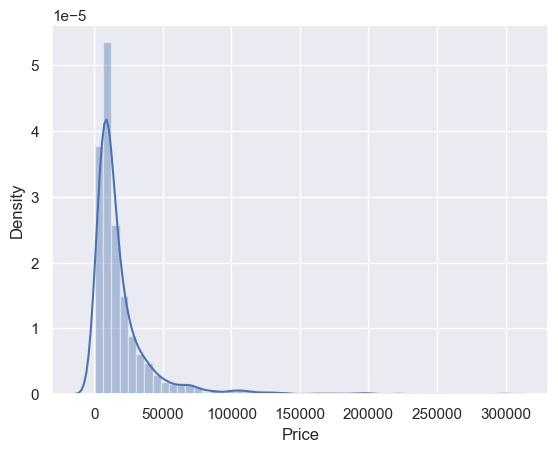

In [12]:
sns.distplot(data_no_mv['Price'])

In [15]:
#deal with outliers 
#outliers are situated around the higher prices (right side of the graph)
#removing 0.5%, or 1% of the problematic samples

In [16]:
q = data_no_mv['Price'].quantile(0.99)

In [17]:
data_1 = data_no_mv[data_no_mv['Price']<q]

In [18]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

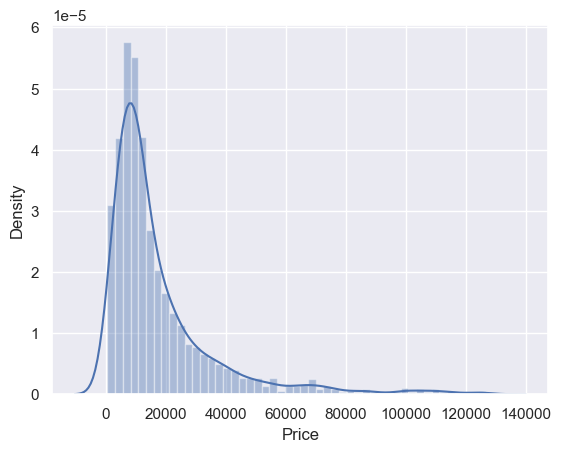

In [21]:
sns.distplot(data_1['Price'])

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

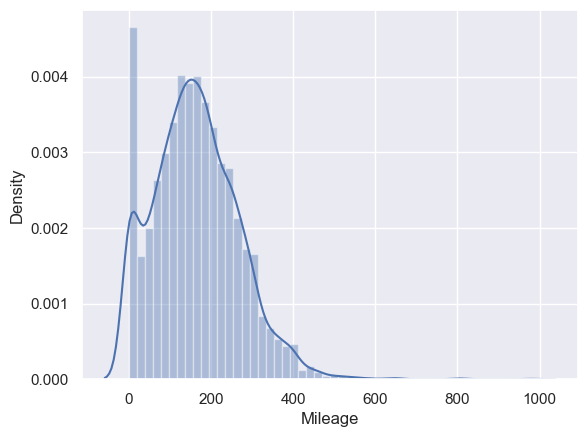

In [22]:
sns.distplot(data_no_mv['Mileage'])

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/2034858564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

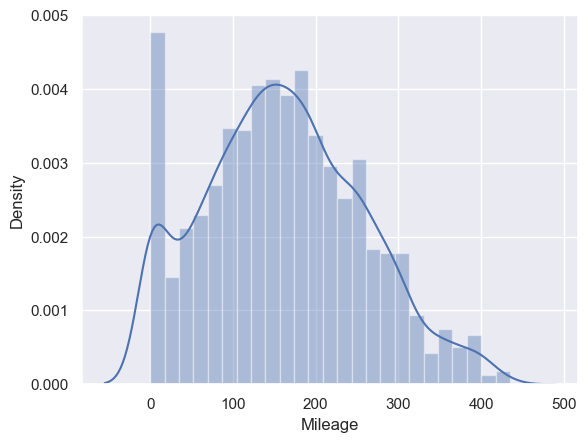

In [23]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

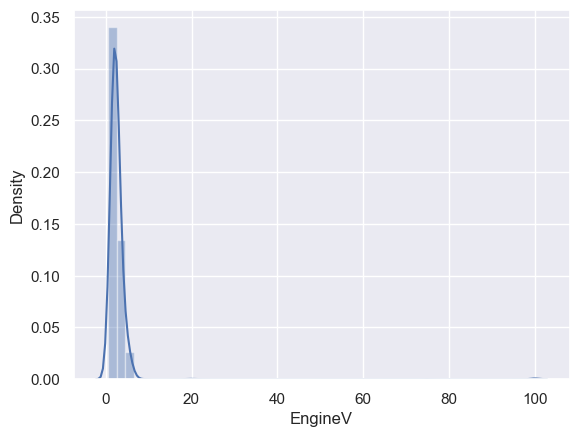

In [24]:
sns.distplot(data_no_mv['EngineV'])

In [25]:
#car engine volumes are usually (always?) below 6.5l(source: trust me bro)
data_3 = data_2[data_2['EngineV']<6.5]

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

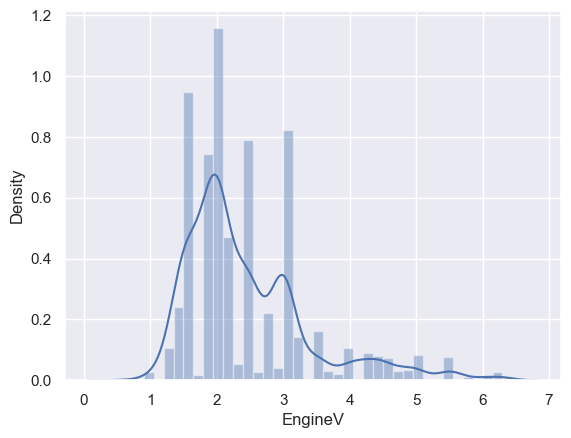

In [26]:
sns.distplot(data_3['EngineV'])

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

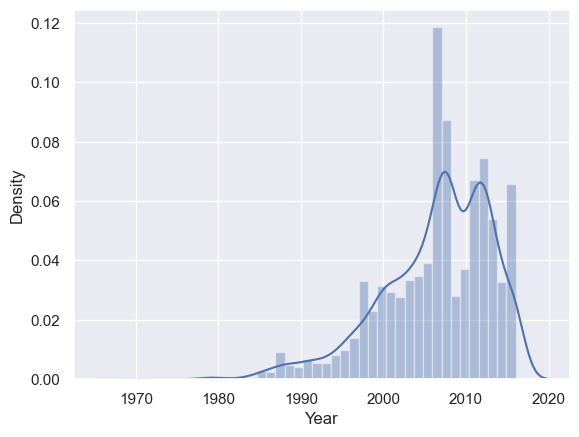

In [27]:
sns.distplot(data_no_mv['Year'])

In [28]:
#the situation with 'Year' is similar to 'Price' and 'Mileage'
#however, the outliers are on the low end
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

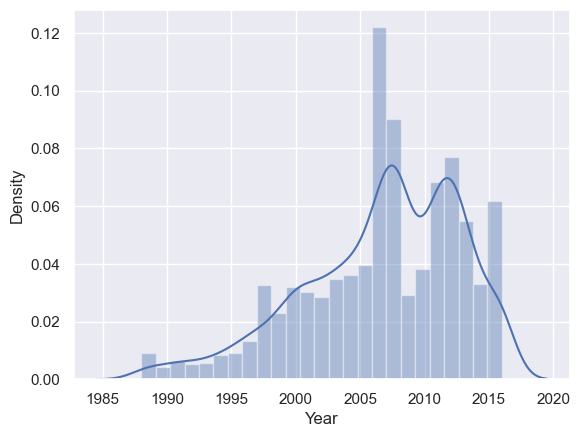

In [30]:
sns.distplot(data_4['Year'])

In [32]:
data_cleaned = data_4.reset_index(drop=True)

In [34]:
#check data_cleaned
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### checking OLS assumption

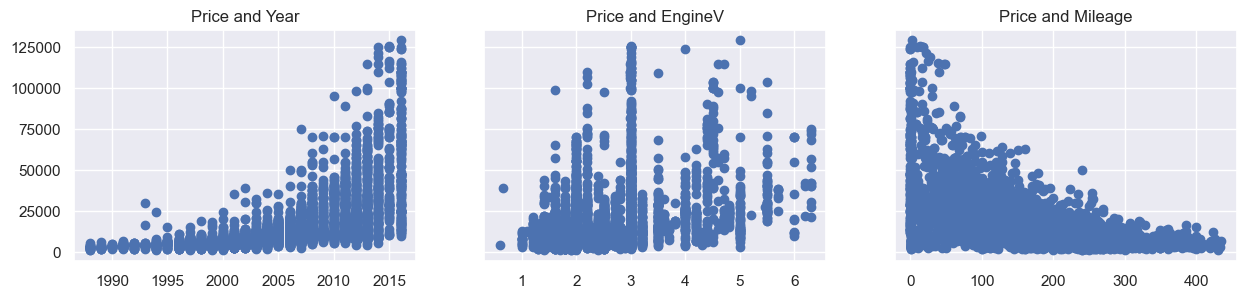

In [35]:
#since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/2958245026.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

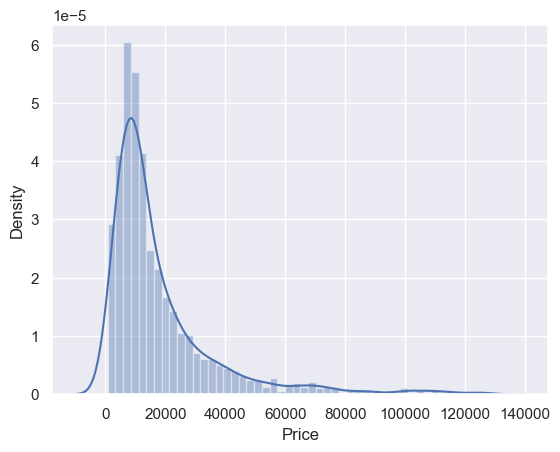

In [37]:
#from the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
#good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

### relaxing the assumption

In [39]:
#transform with log transformation 
log_price = np.log(data_cleaned['Price'])

In [40]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


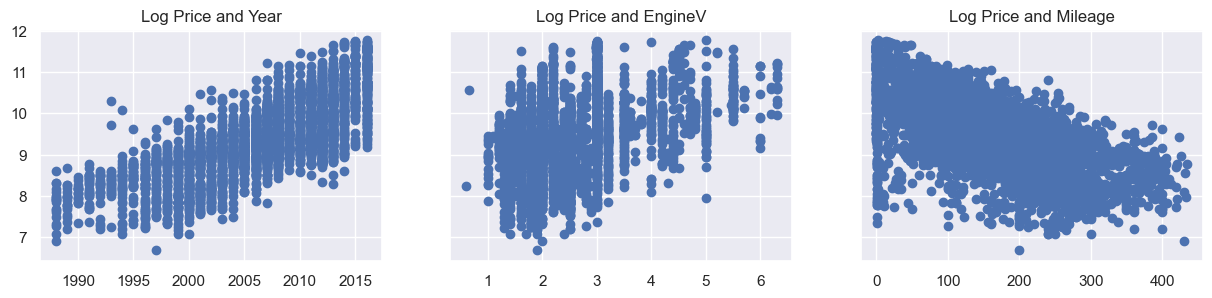

In [42]:
#recheck the three scatters
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [43]:
#drop the old 'Price' one since we will be using the log price variable
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [45]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Multicollinearity

In [46]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
variables = data_cleaned[['Mileage','Year','EngineV']]

In [49]:
vif = pd.DataFrame()

In [50]:
#make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [51]:
#include names so it is easier to explore the result
vif["Features"] = variables.columns

In [52]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [53]:
#remove year from the model since it has the highest VIF
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### create dummy variables

In [54]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [55]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [56]:
#place the dependent variable in the beginning of the df to make our data frame more organized
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [57]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [58]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### linear regression model

In [59]:
#declare inputs and targets

#target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']
#inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [60]:
#scale the data

from sklearn.preprocessing import StandardScaler
#create a scaler object
scaler = StandardScaler()
#fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [61]:
#scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### train test split

In [62]:
from sklearn.model_selection import train_test_split

#split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=666)

### create the regression

In [63]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [64]:
#store outputs in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

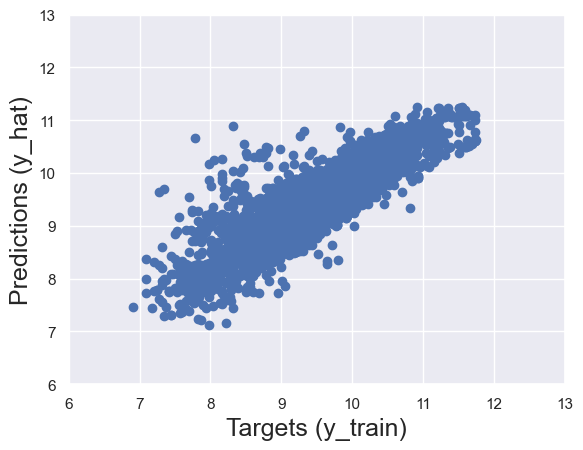

In [67]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/var/folders/b3/twp_vx8x1sngt3s5kz5c1bz80000gn/T/ipykernel_94793/571648146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='log_price', ylabel='Density'>

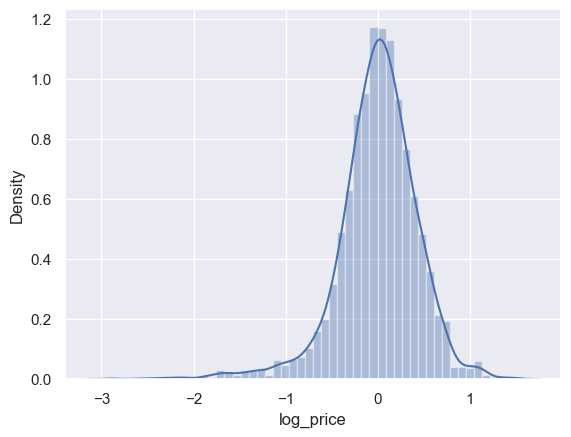

In [68]:
#plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

In [69]:
#R-square
reg.score(x_train,y_train)

0.7531313666478575

In [70]:
#bias
reg.intercept_

9.413739189087885

In [71]:
#weights
reg.coef_

array([-0.45605429,  0.2095319 ,  0.01672759,  0.0093018 , -0.13534493,
       -0.18567209, -0.05694065, -0.08807854, -0.14546456, -0.1066423 ,
       -0.19752215, -0.12691944, -0.1570276 , -0.11811003, -0.02695815,
       -0.15112967,  0.32082204])

In [72]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.456054
1,EngineV,0.209532
2,Brand_BMW,0.016728
3,Brand_Mercedes-Benz,0.009302
4,Brand_Mitsubishi,-0.135345
5,Brand_Renault,-0.185672
6,Brand_Toyota,-0.056941
7,Brand_Volkswagen,-0.088079
8,Body_hatch,-0.145465
9,Body_other,-0.106642


In [73]:
#check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### testing

In [74]:
#test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

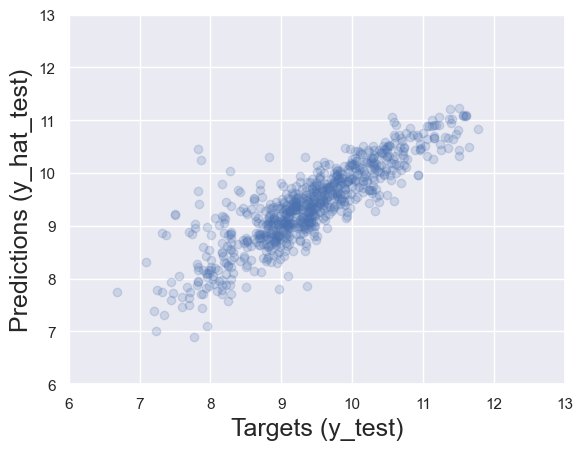

In [75]:
#scatter plot test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [76]:
#manually check these predictions
#take the exponential of the log_price to obtain the actual prices
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,4221.947463
1,61349.080467
2,3151.334275
3,8915.792432
4,3500.626219


In [77]:
#include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,4221.947463,NaN
1,61349.080467,7900.0
2,3151.334275,13300.0
3,8915.792432,NaN
4,3500.626219,NaN
...,...,...
769,10968.126689,NaN
770,63986.919988,NaN
771,10976.468645,NaN
772,6024.156395,NaN


In [78]:
#reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

#check the result
y_test.head()

0     8.293800
1    11.360939
2     9.093807
3     8.948976
4     7.972466
Name: log_price, dtype: float64

In [79]:
#overwrite the 'Target' column with the appropriate values(exponential of test log price)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,4221.947463,3999.0
1,61349.080467,85900.0
2,3151.334275,8900.0
3,8915.792432,7700.0
4,3500.626219,2900.0
...,...,...
769,10968.126689,9500.0
770,63986.919988,38500.0
771,10976.468645,9800.0
772,6024.156395,4999.0


In [80]:
#calculate the difference between the targets and the predictions
#this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

#OLS is basically an algorithm which minimizes the total sum of squared errors (residuals)

#absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4221.947463,3999.0,-222.947463,5.575080
1,61349.080467,85900.0,24550.919533,28.580814
2,3151.334275,8900.0,5748.665725,64.591750
3,8915.792432,7700.0,-1215.792432,15.789512
4,3500.626219,2900.0,-600.626219,20.711249
...,...,...,...,...
769,10968.126689,9500.0,-1468.126689,15.453965
770,63986.919988,38500.0,-25486.919988,66.199792
771,10976.468645,9800.0,-1176.468645,12.004782
772,6024.156395,4999.0,-1025.156395,20.507229


In [81]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15750.890629,18036.576021,2285.685392,39.257901
std,12528.633668,19160.582907,10390.418636,78.831232
min,985.063737,800.000000,-32042.162621,0.124359
25%,7426.670405,7000.000000,-1856.455519,11.655002
50%,11796.911651,11650.000000,318.429510,22.485363
75%,19848.438755,21150.000000,3331.468335,39.427865
max,75402.266319,129222.000000,78959.912490,1281.686505


In [82]:
#check outputs manually
pd.options.display.max_rows = 999
#can display the result with only 2 digits after the dot to make the data set clear
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
718,3804.73,3800.00,-4.73,0.12
567,18850.85,18800.00,-50.85,0.27
22,27190.15,27300.00,109.85,0.40
536,7039.93,6999.00,-40.93,0.58
492,47298.83,47000.00,-298.83,0.64
727,32744.68,33000.00,255.32,0.77
601,7867.32,7800.00,-67.32,0.86
728,29153.88,28900.00,-253.88,0.88
89,22978.43,23200.00,221.57,0.96
554,36274.11,35900.00,-374.11,1.04
